In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading dataset

data = pd.read_excel('iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Taking Classification as the traget column

In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
#we have some missing values SL,SW and PL

# Filing missing values

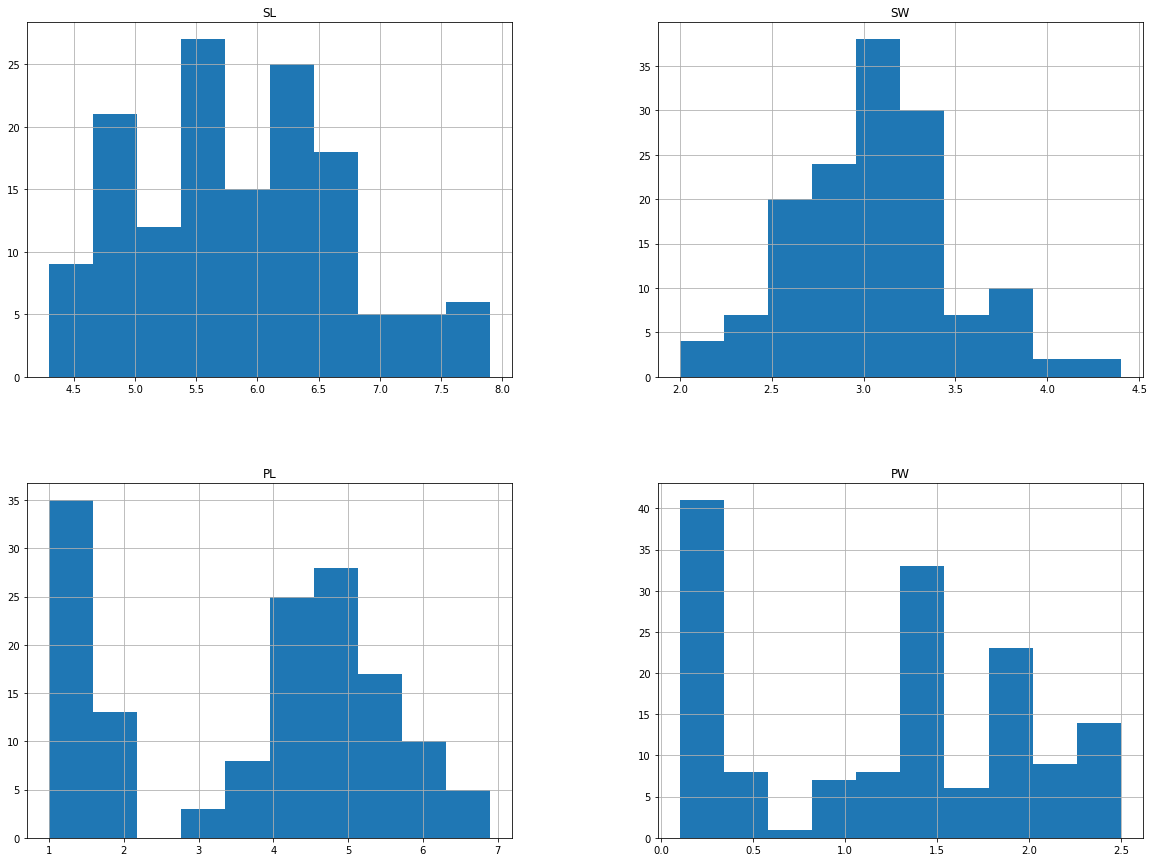

In [9]:

#Plotting histograms to check the distribution of data

freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()


In [10]:
#SL and SW  normally distribute and PL is skewed
#so we fill SL and SW with mean and PL with median

In [11]:

data['SL'] = data['SL'].fillna(data['SL'].mean())

#Filling the null values of 'SL' column with the mean of 'SL'

In [12]:

data['SW'] = data['SW'].fillna(data['SW'].mean())

#Filling the null values of 'SW' column with the mean of 'SW'

In [13]:

data['PL'] = data['PL'].fillna(data['PL'].median())

#Filling the null values of 'PL' column with the median of 'PL'

In [14]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [15]:
#Filled missing values

# Outlier Detection

Text(0.5, 1.0, 'Boxplot of SL')

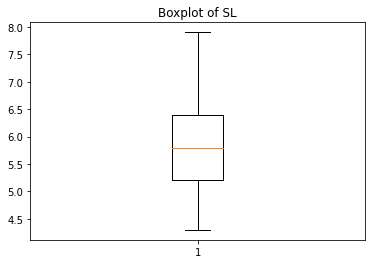

In [16]:
plt.boxplot(data['SL'])
plt.title('Boxplot of SL')

Text(0.5, 1.0, 'Boxplot of SW')

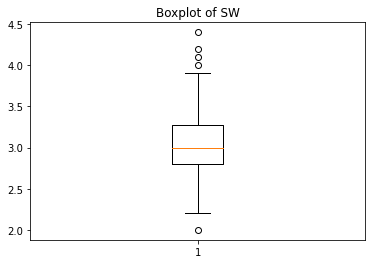

In [17]:
plt.boxplot(data['SW'])
plt.title('Boxplot of SW')

Text(0.5, 1.0, 'Boxplot of PL')

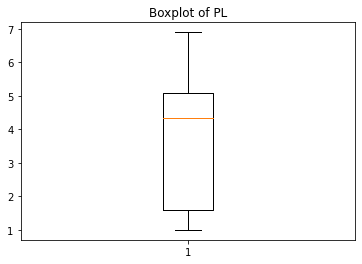

In [18]:
plt.boxplot(data['PL'])
plt.title('Boxplot of PL')

Text(0.5, 1.0, 'Boxplot of PW')

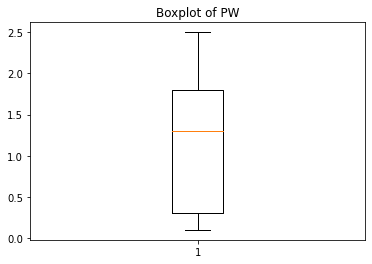

In [19]:
plt.boxplot(data['PW'])
plt.title('Boxplot of PW')

In [20]:
#Only SW column have some outliers

In [21]:
#Outlier Detection using IQR method

Q1 = np.percentile(data['SW'], 25, interpolation='midpoint')
Q2 = np.percentile(data['SW'], 50, interpolation='midpoint')
Q3 = np.percentile(data['SW'], 75, interpolation='midpoint')

print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [22]:
data['SW'].median()

3.0

In [23]:
IQR=Q3-Q1
print(IQR)

0.4500000000000002


In [24]:
#Lower Fence
low_lim = Q1-1.5*IQR

#Upper Fence
up_lim = Q3+1.5*IQR

print(low_lim)
print(up_lim)

2.1249999999999996
3.9250000000000003


In [25]:
# we can identify any values which are above 3.925 or below 2.125 as outliers

#As it is a small data we are not removing outliers

In [26]:
outlier = []
for x in data['SW']:  
    if((x>up_lim) or (x<low_lim)):  # if this is true then x is an outlier
        outlier.append(x)

In [27]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [28]:
#the above are the outliers for SW column

In [29]:
y = data['Classification']
X = data.drop('Classification', axis=1)

# Scaling

In [30]:
X.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.855944,3.049306,3.780000,1.198667
std,0.808480,0.421884,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
from sklearn import preprocessing

std_sc1 = preprocessing.StandardScaler()

In [32]:
X = std_sc1.fit_transform(X)

In [33]:
type(X)

numpy.ndarray

In [34]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [35]:
X = pd.DataFrame(X, columns=['SL', 'SW', 'PL', 'PW'])

In [36]:
X.describe()

,SL,SW,PL,PW
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,3.490726e-16,-2.897682e-16,1.421085e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.930976e+00,-2.495522e+00,-1.612857e+00,-1.444450e+00
25%,-8.140476e-01,-5.929136e-01,-1.264758e+00,-1.181504e+00
50%,-6.942837e-02,-1.172615e-01,3.306937e-01,1.332259e-01
75%,6.751909e-01,5.367602e-01,7.658171e-01,7.905908e-01
max,2.536739e+00,3.212303e+00,1.810113e+00,1.710902e+00


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   random_state=144)

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
log_model = LogisticRegression()
log_model = log_model.fit(X_train, y_train)
y_pred1 = log_model.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [42]:
confusion_matrix(y_test, y_pred1)

array([[12,  0,  0],
       [ 0, 14,  1],
       [ 0,  2, 16]], dtype=int64)

In [43]:
accuracy_score(y_test, y_pred1)

0.9333333333333333

# KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
#steps to find optimum value for k 

metric_k = []
neighbors = range(3, 20)  

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train, y_train)
    y_pred_knn = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred_knn)
    metric_k.append(acc)

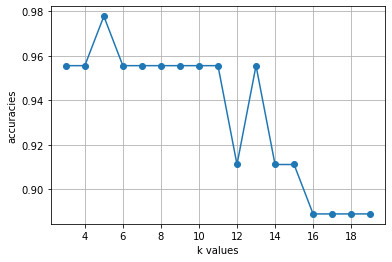

In [46]:
# neighbors is the k values
# metric_k is the accuracy
# so we can plot it

plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k values')
plt.ylabel('accuracies')
plt.grid()

In [47]:
#So maximum accuracy at k = 5

In [48]:
## KNN for k = 5

classifier = KNeighborsClassifier(n_neighbors=5)
classifier = classifier.fit(X_train, y_train)
y_pred_knn = classifier.predict(X_test)

In [49]:
accuracy_score(y_test, y_pred_knn)

0.9777777777777777

# Decision Tree Model

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred2 = dt.predict(X_test)
print(accuracy_score(y_test,y_pred2))

0.9555555555555556


# Random Forest Model

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred3 = rf.predict(X_test)
print(accuracy_score(y_test,y_pred3))

0.9777777777777777


In [ ]:
##Both KNN and Random forest algorithms gives best accuracy here.
##But accuracy changes based on selection of test data and random state.

##Random Forest is best algorithm because KNN models's accuracy changes for differant k values.
## We need to determine K value and the computation time is also high for KNN.